Aim and objective of Analysis
Objectives:

Promote economic growth and stability within each country group.
Reduce disparities in GDP forecasts between country groups.
Identify and leverage opportunities for economic cooperation and collaboration.
Enhance economic resilience to global challenges.
Monitor and evaluate progress towards economic goals.
Foster inclusivity and equitable distribution of economic benefits.
Strengthen regional economic integration and cooperation.
Support the development of sustainable and resilient infrastructure.
Promote innovation and technological advancement.
Enhance human capital development and skills training.

In [177]:
!pip install pandas beautifulsoup4 matplotlib seaborn


In [18]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Step 1: Web Scraping
# Specify the URL of the webpage containing the table
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"

In [20]:
# Fetch the webpage content
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

In [21]:
# Find the table using its attributes (e.g., class, id)
table = soup.find("table", {"class": "wikitable"})  # Replace with actual table attributes

In [22]:
# Extract table data into a pandas DataFrame
df = pd.read_html(str(table))[0]  # Read the first table found

<ipython-input-22-168f65e935a1>:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]  # Read the first table found


In [23]:
# Step 2: EDA
# Display basic information about the DataFrame
print("Data Overview:")
print(df.info())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   (Country/Territory, Country/Territory)  210 non-null    object
 1   (IMF[1][13], Forecast)                  210 non-null    object
 2   (IMF[1][13], Year)                      210 non-null    object
 3   (World Bank[14], Estimate)              210 non-null    object
 4   (World Bank[14], Year)                  210 non-null    object
 5   (United Nations[15], Estimate)          210 non-null    object
 6   (United Nations[15], Year)              210 non-null    object
dtypes: object(7)
memory usage: 11.6+ KB
None


In [24]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Country/Territory IMF[1][13]       World Bank[14]        \
       Country/Territory   Forecast  Year       Estimate  Year   
count                210        210   210            210   210   
unique               210        196    12            203    10   
top                World          —  2024              —  2023   
freq                   1         15   183              8   180   

       United Nations[15]        
                 Estimate  Year  
count                 210   210  
unique                210     9  
top             100834796  2022  
freq                    1   202  


In [25]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Country/Territory   Country/Territory    0
IMF[1][13]          Forecast             0
                    Year                 0
World Bank[14]      Estimate             0
                    Year                 0
United Nations[15]  Estimate             0
                    Year                 0
dtype: int64


In [34]:
df

Country/Territory IMF[1][13]            World Bank[14]             \
    Country/Territory   Forecast       Year       Estimate       Year   
0               World  110047109       2024      105435540       2023   
1       United States   29167779       2024       27360935       2023   
2               China   18273357  [n 1]2024       17794782  [n 3]2023   
3             Germany    4710032       2024        4456081       2023   
4               Japan    4070094       2024        4212945       2023   
..                ...        ...        ...            ...        ...   
205          Kiribati        311       2024            279       2023   
206             Palau        308       2024            263       2023   
207  Marshall Islands        305       2024            284       2023   
208             Nauru        161       2024            154       2023   
209            Tuvalu         66       2024             62       2023   

    United Nations[15]             
              Estimate       Year  
0            100834796       2022  
1             25744100       2022  
2             17963170  [n 1]2022  
3              4076923       2022  
4              4232173       2022  
..                 ...        ...  
205                223       2022  
206                225       2022  
207                279       2022  
208                147       2022  
209                 59       2022  

[210 rows x 7 columns]

In [38]:
df.columns

MultiIndex([( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]',          'Estimate'),
            (    'World Bank[14]',              'Year'),
            ('United Nations[15]',          'Estimate'),
            ('United Nations[15]',              'Year')],
           )

In [41]:
# Step 2: Data Cleaning
# Rename columns for better readability
df.columns = ["Country/Territory", "IMF_Forecast", "IMF_Year", "WorldBank_Estimate", "WorldBank_Year", "UN_Estimate", "UN_Year"]

In [42]:
# Convert numeric columns to appropriate data types
numeric_cols = ["IMF_Forecast", "IMF_Year", "WorldBank_Estimate", "WorldBank_Year", "UN_Estimate", "UN_Year"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col].str.replace(",", ""), errors="coerce")

In [43]:
# Handle missing values (if any)
# df.dropna(inplace=True)

In [44]:
# Step 3: EDA
print("Data Overview:")
print(df.info())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country/Territory   210 non-null    object 
 1   IMF_Forecast        195 non-null    float64
 2   IMF_Year            186 non-null    float64
 3   WorldBank_Estimate  202 non-null    float64
 4   WorldBank_Year      196 non-null    float64
 5   UN_Estimate         209 non-null    float64
 6   UN_Year             202 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.6+ KB
None


In [45]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       IMF_Forecast     IMF_Year  WorldBank_Estimate  WorldBank_Year  \
count  1.950000e+02   186.000000        2.020000e+02      196.000000   
mean   1.128700e+06  2023.967742        1.037205e+06     2022.903061   
std    8.239994e+06     0.252624        7.751885e+06        0.344615   
min    6.600000e+01  2022.000000        6.200000e+01     2021.000000   
25%    1.335050e+04  2024.000000        9.284000e+03     2023.000000   
50%    4.714700e+04  2024.000000        3.757300e+04     2023.000000   
75%    2.977925e+05  2024.000000        2.594322e+05     2023.000000   
max    1.100471e+08  2024.000000        1.054355e+08     2023.000000   

        UN_Estimate  UN_Year  
count  2.090000e+02    202.0  
mean   9.612777e+05   2022.0  
std    7.293076e+06      0.0  
min    5.900000e+01   2022.0  
25%    8.772000e+03   2022.0  
50%    3.171700e+04   2022.0  
75%    2.371010e+05   2022.0  
max    1.008348e+08   2022.0  


In [46]:
# Explore data distributions and relationships (e.g., correlations)
# print("\nCorrelation Matrix:")
# print(df.corr())

In [49]:
# Step 4: Visualization for Top 20 Countries
# Sort the DataFrame by IMF_Forecast in descending order and select the top 20
top_20_countries = df.sort_values(by="IMF_Forecast", ascending=False).head(20)

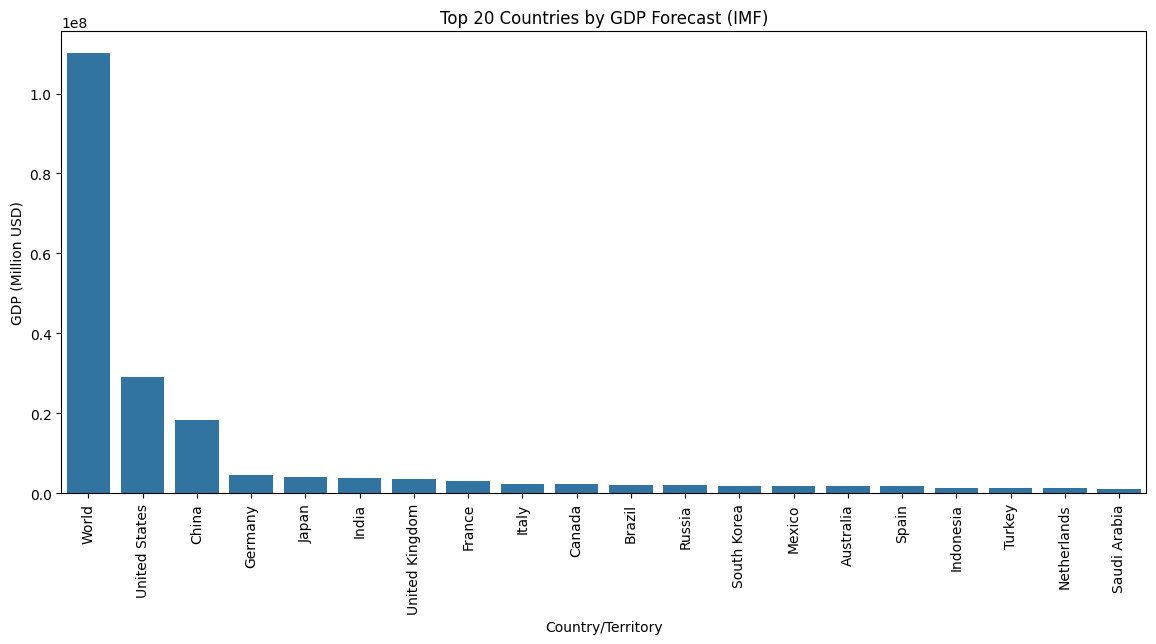

In [50]:
# Visualization for top 20
plt.figure(figsize=(14, 6))  # Adjust figure size as needed
sns.barplot(data=top_20_countries, x="Country/Territory", y="IMF_Forecast")
plt.title("Top 20 Countries by GDP Forecast (IMF)")
plt.xlabel("Country/Territory")
plt.ylabel("GDP (Million USD)")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [51]:
# Step 4: Visualization for Least 20 Countries
# Sort the DataFrame by IMF_Forecast in ascending order and select the top 20 (which are actually the least 20)
least_20_countries = df.sort_values(by="IMF_Forecast").head(20)

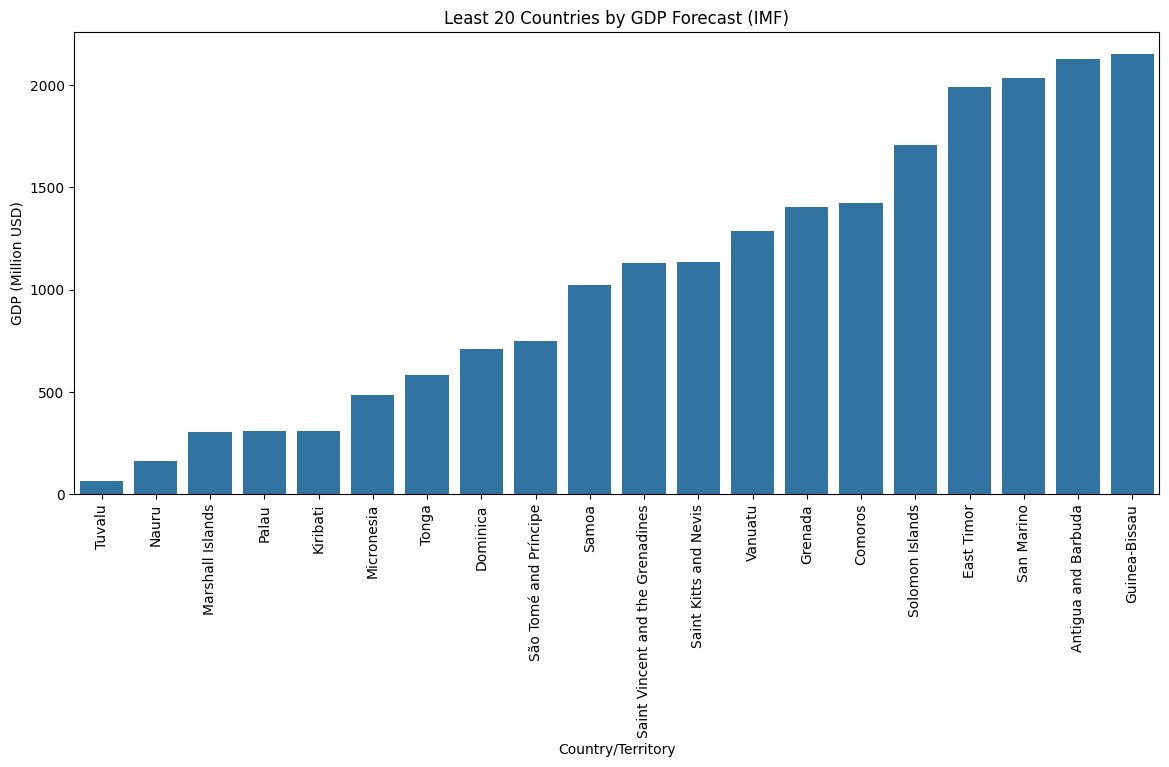

In [52]:
# Visualization for least 20
plt.figure(figsize=(14, 6))  # Adjust figure size as needed
sns.barplot(data=least_20_countries, x="Country/Territory", y="IMF_Forecast")
plt.title("Least 20 Countries by GDP Forecast (IMF)")
plt.xlabel("Country/Territory")
plt.ylabel("GDP (Million USD)")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [53]:
# Step 4: Visualization for Middle 20 Countries
# Sort the DataFrame by IMF_Forecast and select the middle 20
total_countries = len(df)
start_index = (total_countries - 20) // 2  # Calculate the starting index for the middle 20
middle_20_countries = df.sort_values(by="IMF_Forecast")[start_index:start_index + 20]

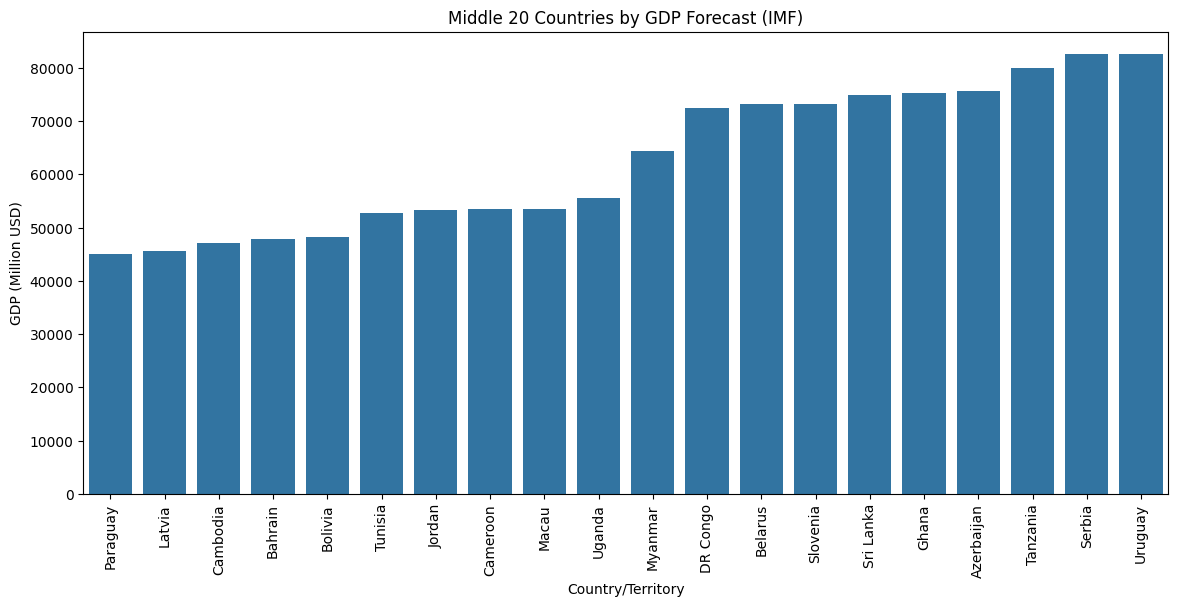

In [55]:
# Visualization for middle 20
plt.figure(figsize=(14, 6))  # Adjust figure size as needed
sns.barplot(data=middle_20_countries, x="Country/Territory", y="IMF_Forecast")
plt.title("Middle 20 Countries by GDP Forecast (IMF)")
plt.xlabel("Country/Territory")
plt.ylabel("GDP (Million USD)")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [56]:
# Step 4: List Countries by GDP
# Sort the DataFrame by IMF_Forecast in descending order
countries_by_gdp = df.sort_values(by="IMF_Forecast", ascending=False)

In [57]:
# Print the list of countries and their GDP
print("Countries by GDP (IMF Forecast):")
for index, row in countries_by_gdp.iterrows():
    print(f"{row['Country/Territory']}: {row['IMF_Forecast']}")

Countries by GDP (IMF Forecast):
World: 110047109.0
United States: 29167779.0
China: 18273357.0
Germany: 4710032.0
Japan: 4070094.0
India: 3889130.0
United Kingdom: 3587545.0
France: 3174099.0
Italy: 2376510.0
Canada: 2214796.0
Brazil: 2188419.0
Russia: 2184316.0
South Korea: 1869916.0
Mexico: 1848125.0
Australia: 1802006.0
Spain: 1731469.0
Indonesia: 1402590.0
Turkey: 1344318.0
Netherlands: 1218401.0
Saudi Arabia: 1100706.0
Switzerland: 942265.0
Poland: 862908.0
Taiwan: 775017.0
Belgium: 662183.0
Sweden: 609039.0
Argentina: 604382.0
Ireland: 560566.0
United Arab Emirates: 545053.0
Austria: 535804.0
Singapore: 530708.0
Thailand: 528919.0
Israel: 528067.0
Norway: 503752.0
Philippines: 470062.0
Vietnam: 468485.0
Bangladesh: 451468.0
Malaysia: 439748.0
Iran: 434243.0
Colombia: 417207.0
Denmark: 412293.0
South Africa: 403045.0
Hong Kong: 401751.0
Romania: 380561.0
Egypt: 380044.0
Pakistan: 374595.0
Czech Republic: 342992.0
Chile: 328720.0
Finland: 306083.0
Portugal: 303032.0
Kazakhstan: 29

In [58]:
df.shape

(210, 7)

In [59]:
# Step 4: Classify and Group Countries by GDP

# Sort the DataFrame by IMF_Forecast in descending order
countries_by_gdp = df.sort_values(by="IMF_Forecast", ascending=False)

In [60]:
# Create a dictionary to store the country groups
country_groups = {}

In [73]:
# Divide the countries into 7 groups of 30 countries each
for i in range(7):
    group_name = f"group_{i + 1}"
    start_index = i * 30
    end_index = (i + 1) * 30
    country_groups[group_name] = countries_by_gdp[start_index:end_index]
first_30_countries = country_groups['group_1']

In [62]:
# Print the country groups
# for group_name, group_data in country_groups.items():
#     print(f"\n{group_name}:")
#     print(group_data["Country/Territory"].tolist()

In [63]:
for group_name, group_data in country_groups.items():
  print(f"\n{group_name}:")
  print(group_data["Country/Territory"].tolist())


group_1:
['World', 'United States', 'China', 'Germany', 'Japan', 'India', 'United Kingdom', 'France', 'Italy', 'Canada', 'Brazil', 'Russia', 'South Korea', 'Mexico', 'Australia', 'Spain', 'Indonesia', 'Turkey', 'Netherlands', 'Saudi Arabia', 'Switzerland', 'Poland', 'Taiwan', 'Belgium', 'Sweden', 'Argentina', 'Ireland', 'United Arab Emirates', 'Austria', 'Singapore']

group_2:
['Thailand', 'Israel', 'Norway', 'Philippines', 'Vietnam', 'Bangladesh', 'Malaysia', 'Iran', 'Colombia', 'Denmark', 'South Africa', 'Hong Kong', 'Romania', 'Egypt', 'Pakistan', 'Czech Republic', 'Chile', 'Finland', 'Portugal', 'Kazakhstan', 'Peru', 'Iraq', 'Algeria', 'Greece', 'New Zealand', 'Hungary', 'Qatar', 'Nigeria', 'Ukraine', 'Kuwait']

group_3:
['Morocco', 'Ethiopia', 'Slovakia', 'Dominican Republic', 'Ecuador', 'Puerto Rico', 'Kenya', 'Angola', 'Uzbekistan', 'Guatemala', 'Oman', 'Bulgaria', 'Venezuela', 'Costa Rica', 'Luxembourg', 'Croatia', 'Panama', 'Ivory Coast', 'Turkmenistan', 'Lithuania', 'Uruguay

In [74]:
# Sort the DataFrame by IMF_Forecast in descending order
countries_by_gdp = df.sort_values(by="IMF_Forecast", ascending=False)

In [75]:
# Create a list to store the group data
group_data_list = []

In [76]:
# Iterate through the groups and append data to the list
for group_name, group_data in country_groups.items():
    for country in group_data["Country/Territory"].tolist():
        group_data_list.append([group_name, country])

In [77]:
# Create a new DataFrame from the group data list
grouped_countries_df = pd.DataFrame(group_data_list, columns=['Group', 'Country/Territory'])

In [78]:
# Display the new DataFrame
# print(grouped_countries_df)

In [79]:
print(grouped_countries_df)

       Group         Country/Territory
0    group_1                     World
1    group_1             United States
2    group_1                     China
3    group_1                   Germany
4    group_1                     Japan
..       ...                       ...
205  group_7                 Greenland
206  group_7                   Eritrea
207  group_7                  Zanzibar
208  group_7              Sint Maarten
209  group_7  Turks and Caicos Islands

[210 rows x 2 columns]


In [89]:
grouped_countries_df[1:]

,Group,Country/Territory
1,group_1,United States
2,group_1,China
3,group_1,Germany
4,group_1,Japan
5,group_1,India
...,...,...
205,group_7,Greenland
206,group_7,Eritrea
207,group_7,Zanzibar
208,group_7,Sint Maarten


In [90]:
table_data = {}

In [91]:
# Iterate through the groups and add countries to the table data
max_countries_in_group = 0  # To track the maximum number of countries in any group
for group_name, group_data in country_groups.items():
    table_data[group_name] = group_data["Country/Territory"].tolist()
    max_countries_in_group = max(max_countries_in_group, len(table_data[group_name]))

In [92]:
# Create a list of lists to represent the table
table_rows = []
for i in range(max_countries_in_group):
    row = []
    for group_name in country_groups.keys():
        if i < len(table_data[group_name]):
            row.append(table_data[group_name][i])
        else:
            row.append(None)  # Add None for empty cells
    table_rows.append(row)

In [93]:
# Create a DataFrame from the table rows and group names as column headers
grouped_countries_table = pd.DataFrame(table_rows, columns=country_groups.keys())

In [94]:
# Display the table
# print(grouped_countries_table)

In [96]:
grouped_countries_table[1:]

,group_1,group_2,group_3,group_4,group_5,group_6,group_7
1,United States,Israel,Ethiopia,Macau,Mongolia,Equatorial Guinea,Grenada
2,China,Norway,Slovakia,Cameroon,Burkina Faso,Mauritania,Vanuatu
3,Germany,Philippines,Dominican Republic,Jordan,Lebanon,Togo,Saint Kitts and Nevis
4,Japan,Vietnam,Ecuador,Tunisia,Mali,Montenegro,Saint Vincent and the Grenadines
5,India,Bangladesh,Puerto Rico,Bolivia,Botswana,Maldives,Samoa
6,United Kingdom,Malaysia,Kenya,Bahrain,Benin,Barbados,São Tomé and Príncipe
7,France,Iran,Angola,Cambodia,Guyana,South Sudan,Dominica
8,Italy,Colombia,Uzbekistan,Latvia,Gabon,Fiji,Tonga
9,Canada,Denmark,Guatemala,Paraguay,Jamaica,Eswatini,Micronesia
10,Brazil,South Africa,Oman,Libya,Nicaragua,Liberia,Kiribati


In [99]:
# Step 5: Plot for Group 1 (Sorted by GDP, Excluding "World")


In [152]:
# Select the data for group_1, exclude "World", and sort by GDP
group_1_data = country_groups['group_1'][country_groups['group_1']["Country/Territory"] != "World"].sort_values(by="IMF_Forecast", ascending=False)

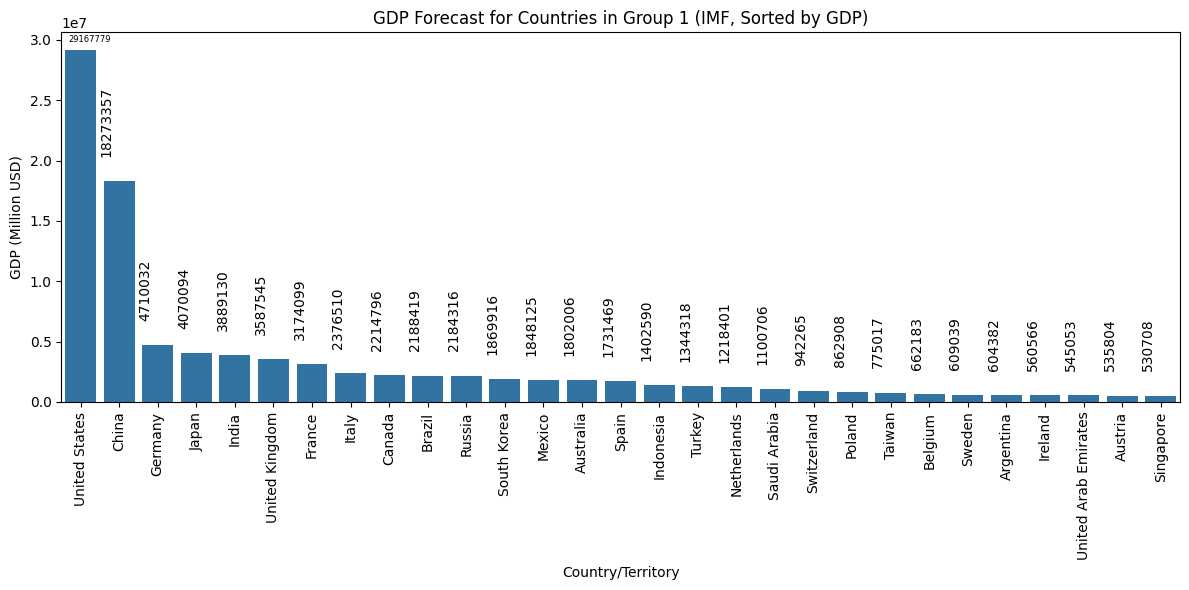

In [162]:
# Visualization for group_1 (sorted, excluding "World", with non-overlapping data labels)
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
ax = sns.barplot(data=group_1_data, x="Country/Territory", y="IMF_Forecast")
plt.title("GDP Forecast for Countries in Group 1 (IMF, Sorted by GDP)")
plt.xlabel("Country/Territory")
plt.ylabel("GDP (Million USD)")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Add non-overlapping data labels using adjustText, positioned slightly above bars
texts = []
for i, p in enumerate(ax.patches):
    height = p.get_height()
    if i == 0:  # Check if it's the first bar
        rotation = 0  # Set rotation to 0 for horizontal label
        vertical_offset = 0.05e7  # Further reduced vertical offset for first bar
        fontsize = 6  # Further reduced font size for first bar
        horizontal_alignment = 'left'  # Align to the left
        horizontal_offset = p.get_width() * 0.1  # Adjust to control leftward shift
    else:
        rotation = 90  # Set rotation to 90 for vertical labels
        vertical_offset = 0.2e7  # Reduced vertical offset for other bars
        fontsize = 10  # Default font size for other bars
        horizontal_alignment = 'center'  # Default alignment for other bars

    texts.append(ax.text(p.get_x() + horizontal_offset, height + vertical_offset,
                        '{:1.0f}'.format(height), ha=horizontal_alignment, va='bottom', rotation=rotation,
                        fontsize=fontsize))  # Apply font size

plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

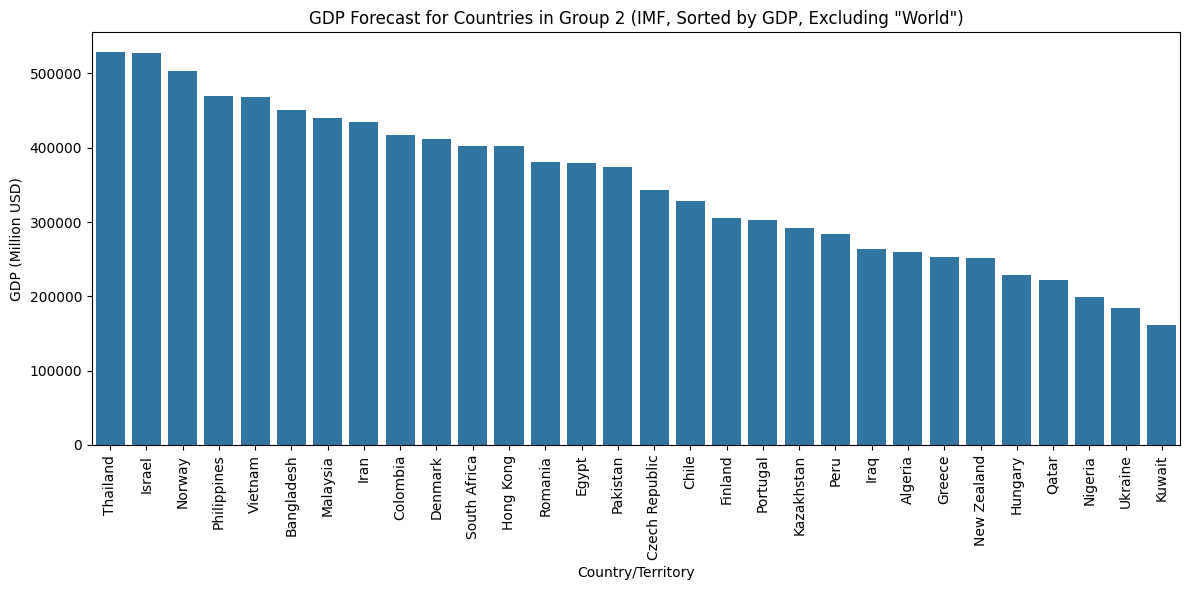

In [165]:
# Select the data for group_2, exclude "World", and sort by GDP
group_2_data = country_groups['group_2'][country_groups['group_2']["Country/Territory"] != "World"].sort_values(by="IMF_Forecast", ascending=False)

# Visualization for group_2 (sorted, excluding "World", with non-overlapping data labels)
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
ax = sns.barplot(data=group_2_data, x="Country/Territory", y="IMF_Forecast")
plt.title("GDP Forecast for Countries in Group 2 (IMF, Sorted by GDP, Excluding \"World\")")
plt.xlabel("Country/Territory")
plt.ylabel("GDP (Million USD)")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Add non-overlapping data labels using adjustText, positioned slightly above bars
texts = []
for i, p in enumerate(ax.patches):
    height = p.get_height()
    if i == 0:  # Check if it's the first bar
        rotation = 0  # Set rotation to 0 for horizontal label
        vertical_offset = 0.05e7  # Further reduced vertical offset for first bar
        fontsize = 6  # Further reduced font size for first bar
        horizontal_alignment = 'left'  # Align to the left
        horizontal_offset = p.get_width() * 0.1  # Adjust to control leftward shift
    else:
        rotation = 90  # Set rotation to 90 for vertical labels
        vertical_offset = 0.2e7  # Reduced vertical offset for other bars
        fontsize = 6  # Consistent font size for all labels
        horizontal_alignment = 'center'  # Default alignment for other bars
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

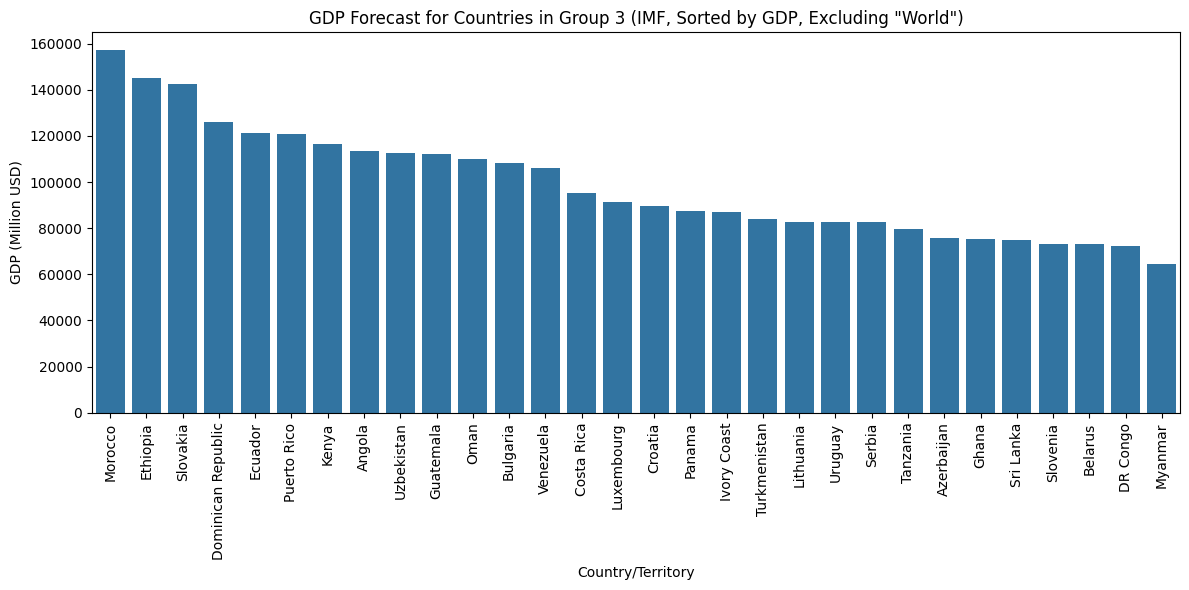

In [167]:

# Select the data for group_3, exclude "World", and sort by GDP
group_3_data = country_groups['group_3'][country_groups['group_3']["Country/Territory"] != "World"].sort_values(by="IMF_Forecast", ascending=False)

# Visualization for group_3 (sorted, excluding "World", with non-overlapping data labels)
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
ax = sns.barplot(data=group_3_data, x="Country/Territory", y="IMF_Forecast")
plt.title("GDP Forecast for Countries in Group 3 (IMF, Sorted by GDP, Excluding \"World\")")
plt.xlabel("Country/Territory")
plt.ylabel("GDP (Million USD)")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Add non-overlapping data labels using adjustText, positioned slightly above bars
texts = []
for i, p in enumerate(ax.patches):
    height = p.get_height()
    if i == 0:  # Check if it's the first bar
        rotation = 0  # Set rotation to 0 for horizontal label
        vertical_offset = 0.05e7  # Further reduced vertical offset for first bar
        fontsize = 6  # Further reduced font size for first bar
        horizontal_alignment = 'left'  # Align to the left
        horizontal_offset = p.get_width() * 0.1  # Adjust to control leftward shift
    else:
        rotation = 90  # Set rotation to 90 for vertical labels
        vertical_offset = 0.2e7  # Reduced vertical offset for other bars
        fontsize = 6  # Consistent font size for all labels
        horizontal_alignment = 'center'  # Default alignment for other bars

plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

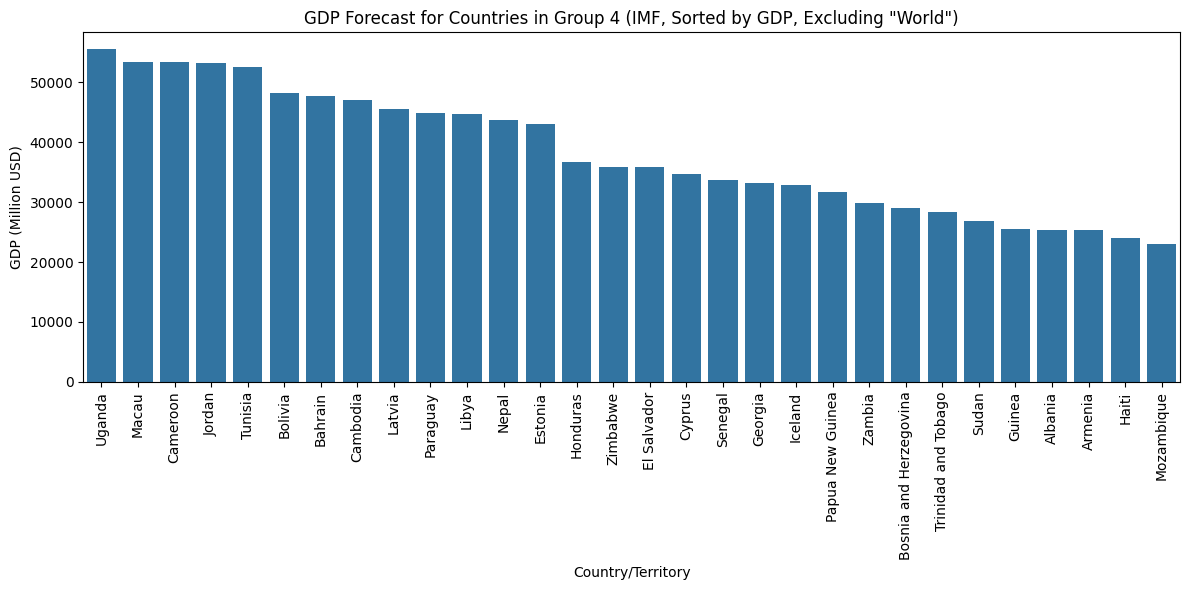

In [169]:
# Select the data for group_4, exclude "World", and sort by GDP
group_4_data = country_groups['group_4'][country_groups['group_4']["Country/Territory"] != "World"].sort_values(by="IMF_Forecast", ascending=False)

# Visualization for group_4 (sorted, excluding "World", with non-overlapping data labels)
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
ax = sns.barplot(data=group_4_data, x="Country/Territory", y="IMF_Forecast")
plt.title("GDP Forecast for Countries in Group 4 (IMF, Sorted by GDP, Excluding \"World\")")
plt.xlabel("Country/Territory")
plt.ylabel("GDP (Million USD)")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Add non-overlapping data labels using adjustText, positioned slightly above bars
texts = []
for i, p in enumerate(ax.patches):
    height = p.get_height()
    if i == 0:  # Check if it's the first bar
        rotation = 0  # Set rotation to 0 for horizontal label
        vertical_offset = 0.05e7  # Further reduced vertical offset for first bar
        fontsize = 6  # Further reduced font size for first bar
        horizontal_alignment = 'left'  # Align to the left
        horizontal_offset = p.get_width() * 0.1  # Adjust to control leftward shift
    else:
        rotation = 90  # Set rotation to 90 for vertical labels
        vertical_offset = 0.2e7  # Reduced vertical offset for other bars
        fontsize = 6  # Consistent font size for all labels
        horizontal_alignment = 'center'  # Default alignment for other bars
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

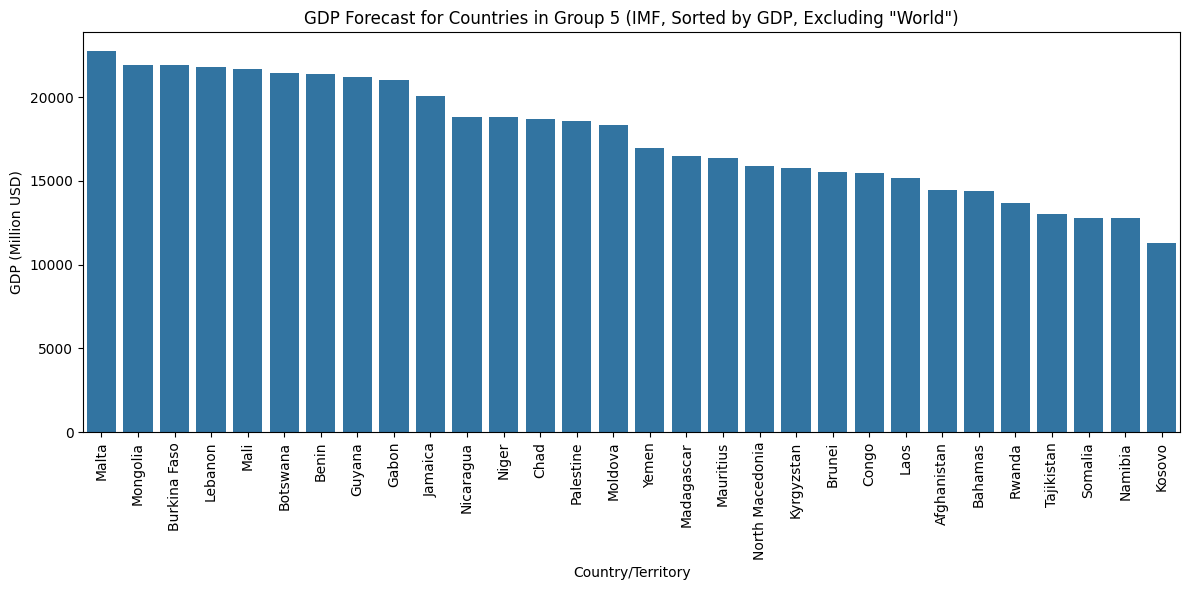

In [171]:

# Select the data for group_5, exclude "World", and sort by GDP
group_5_data = country_groups['group_5'][country_groups['group_5']["Country/Territory"] != "World"].sort_values(by="IMF_Forecast", ascending=False)

# Visualization for group_5 (sorted, excluding "World", with non-overlapping data labels)
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
ax = sns.barplot(data=group_5_data, x="Country/Territory", y="IMF_Forecast")
plt.title("GDP Forecast for Countries in Group 5 (IMF, Sorted by GDP, Excluding \"World\")")
plt.xlabel("Country/Territory")
plt.ylabel("GDP (Million USD)")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Add non-overlapping data labels using adjustText, positioned slightly above bars
texts = []
for i, p in enumerate(ax.patches):
    height = p.get_height()
    if i == 0:  # Check if it's the first bar
        rotation = 0  # Set rotation to 0 for horizontal label
        vertical_offset = 0.05e7  # Further reduced vertical offset for first bar
        fontsize = 6  # Further reduced font size for first bar
        horizontal_alignment = 'left'  # Align to the left
        horizontal_offset = p.get_width() * 0.1  # Adjust to control leftward shift
    else:
        rotation = 90  # Set rotation to 90 for vertical labels
        vertical_offset = 0.2e7  # Reduced vertical offset for other bars
        fontsize = 6  # Consistent font size for all labels
        horizontal_alignment = 'center'  # Default alignment for other bars

plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

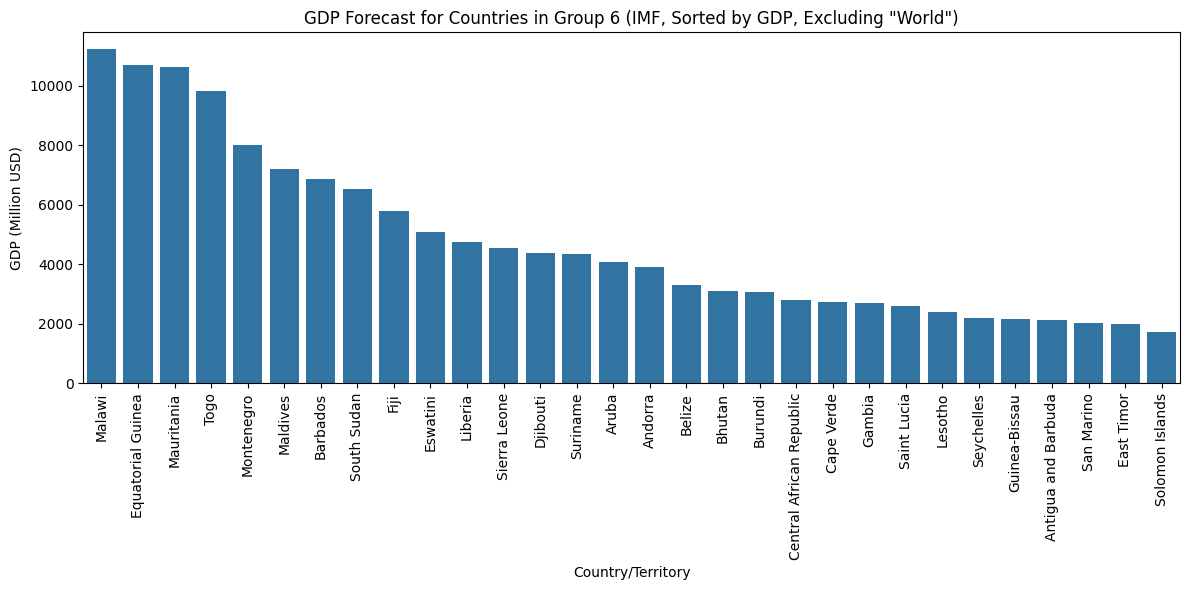

In [173]:
# Select the data for group_6, exclude "World", and sort by GDP
group_6_data = country_groups['group_6'][country_groups['group_6']["Country/Territory"] != "World"].sort_values(by="IMF_Forecast", ascending=False)

# Visualization for group_6 (sorted, excluding "World", with non-overlapping data labels)
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
ax = sns.barplot(data=group_6_data, x="Country/Territory", y="IMF_Forecast")
plt.title("GDP Forecast for Countries in Group 6 (IMF, Sorted by GDP, Excluding \"World\")")
plt.xlabel("Country/Territory")
plt.ylabel("GDP (Million USD)")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Add non-overlapping data labels using adjustText, positioned slightly above bars
texts = []
for i, p in enumerate(ax.patches):
    height = p.get_height()
    if i == 0:  # Check if it's the first bar
        rotation = 0  # Set rotation to 0 for horizontal label
        vertical_offset = 0.05e7  # Further reduced vertical offset for first bar
        fontsize = 6  # Further reduced font size for first bar
        horizontal_alignment = 'left'  # Align to the left
        horizontal_offset = p.get_width() * 0.1  # Adjust to control leftward shift
    else:
        rotation = 90  # Set rotation to 90 for vertical labels
        vertical_offset = 0.2e7  # Reduced vertical offset for other bars
        fontsize = 6  # Consistent font size for all labels
        horizontal_alignment = 'center'  # Default alignment for other bars

plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

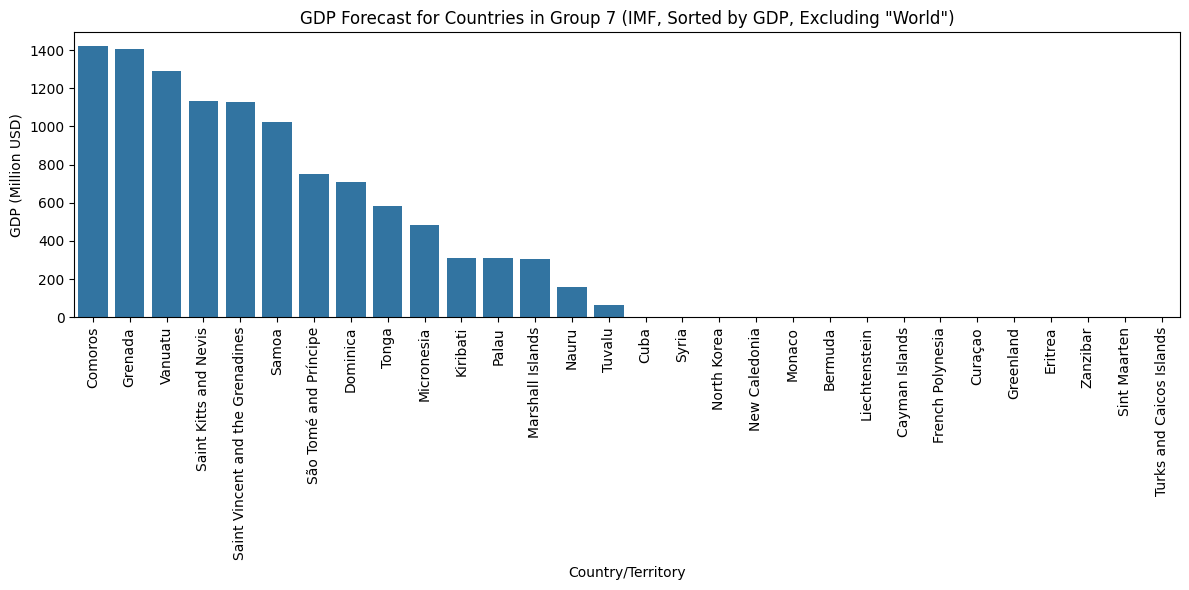

In [175]:
# Select the data for group_7, exclude "World", and sort by GDP
group_7_data = country_groups['group_7'][country_groups['group_7']["Country/Territory"] != "World"].sort_values(by="IMF_Forecast", ascending=False)

# Visualization for group_7 (sorted, excluding "World", with non-overlapping data labels)
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
ax = sns.barplot(data=group_7_data, x="Country/Territory", y="IMF_Forecast")
plt.title("GDP Forecast for Countries in Group 7 (IMF, Sorted by GDP, Excluding \"World\")")
plt.xlabel("Country/Territory")
plt.ylabel("GDP (Million USD)")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Add non-overlapping data labels using adjustText, positioned slightly above bars
texts = []
for i, p in enumerate(ax.patches):
    height = p.get_height()
    if i == 0:  # Check if it's the first bar
        rotation = 0  # Set rotation to 0 for horizontal label
        vertical_offset = 0.05e7  # Further reduced vertical offset for first bar
        fontsize = 6  # Further reduced font size for first bar
        horizontal_alignment = 'left'  # Align to the left
        horizontal_offset = p.get_width() * 0.1  # Adjust to control leftward shift
    else:
        rotation = 90  # Set rotation to 90 for vertical labels
        vertical_offset = 0.2e7  # Reduced vertical offset for other bars
        fontsize = 6  # Consistent font size for all labels
        horizontal_alignment = 'center'  # Default alignment for other bars

plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

Conclusion:

The visualization reveals variations in GDP forecasts across the different country groups.
Within each group, there are clear differences in the forecasted GDP of individual countries.
The plots highlight the top-performing countries within each group based on GDP forecasts.
The analysis helps in identifying potential economic trends and disparities among country groups

Recommendations:

1. Further investigation is recommended to understand the factors driving the variations in GDP forecasts across country groups.

2. Policymakers and businesses can use these insights to make informed decisions related to investment, trade, and economic development strategies.

3. Monitoring and tracking GDP forecasts over time can provide valuable information for assessing economic growth and stability.

4. Consider incorporating additional economic indicators and data sources to gain a more comprehensive understanding of the economic landscape.

5. Regularly updating the analysis with the latest data can help in staying informed about evolving economic trends.

Note:

These recommendations are based solely on the GDP forecasts visualized in the analysis.
Additional factors and data should be considered for a more comprehensive and nuanced understanding of the economic outlook for these country groups